# Semestrální práce

**Subject**: Programovací jazyky pro data science - Python a R

**Semester**: ZS 2022/23

**Authors**: Barbora Dobrovolná, Jáchym Bielesz

**Abstract**: Neironicky můj oblíbenej halucinogen. Pokusíme se tyhle záškodníky rozdělit podle jejich jedovatosti, respektive jedlosti.

**Topic**: Klasifikace jedlosti/jedovatosti hub na základě jiných parametrů.

**Dataset**: https://www.kaggle.com/datasets/uciml/mushroom-classification

### Instalations

In [86]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [87]:
%pip install pandas numpy scikit-learn matplotlib graphviz # Modeling - Decision Trees

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


### Imports

In [88]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#pandas, numpy, random.randint
import pandas as pd
import numpy as np
from random import randint
#sklearn preprocessing functions
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
#sklearn models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
#sklearn model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegressionCV
#matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
#setting random seed
np.random.seed(12345)

In [90]:
# loading the dataset from csv
df_load = pd.read_csv(filepath_or_buffer="mushrooms.csv")

### Dataset specifications
<b>Attribute Information:</b>

<ul>
 <li><b>(classes: edible=e, poisonous=p)</b></li>
 <li>cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s</li>
 <li>cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s</li>
 <li>cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y</li>
 <li>bruises: bruises=t,no=f</li>
 <li>odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s</li>
 <li>gill-attachment: attached=a,descending=d,free=f,notched=n</li>
 <li>gill-spacing: close=c,crowded=w,distant=d</li>
 <li>gill-size: broad=b,narrow=n</li>
 <li>gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y</li>
 <li>stalk-shape: enlarging=e,tapering=t</li>
 <li>stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?</li>
 <li>stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s</li>
 <li>stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s</li>
 <li>stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y</li>
 <li>stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y</li>
 <li>veil-type: partial=p,universal=u</li>
 <li>veil-color: brown=n,orange=o,white=w,yellow=y</li>
 <li>ring-number: none=n,one=o,two=t</li>
 <li>ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z</li>
 <li>spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y</li>
 <li>population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y</li>
</ul>
 <li>habitat:
grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

### Exploratory data analysis

In [91]:
# looking at the first few rows of the dataset
df_load.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [92]:
# shape of dataframe
print("Number of rows:", df_load.shape[0])
print("Number of columns:", df_load.shape[1])
# names of columns
print("Names of columns:", list(df_load.columns))

Number of rows: 8124
Number of columns: 23
Names of columns: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [93]:
# info about data
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

At first glance everything seems to be fine, but from the dataset specifications we know, that NULL values
are actually substituted by the **question mark "?".** <br>
So we have to check, whether the **question mark does in fact appear** somewhere in the dataset.

In [94]:
print("Distinct values for columns\n")
for i in list(df_load):
    # show the list of values  
    print(i + ": " + str(df_load[i].unique().tolist()))

Distinct values for columns

class: ['p', 'e']
cap-shape: ['x', 'b', 's', 'f', 'k', 'c']
cap-surface: ['s', 'y', 'f', 'g']
cap-color: ['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r']
bruises: ['t', 'f']
odor: ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']
gill-attachment: ['f', 'a']
gill-spacing: ['c', 'w']
gill-size: ['n', 'b']
gill-color: ['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o']
stalk-shape: ['e', 't']
stalk-root: ['e', 'c', 'b', 'r', '?']
stalk-surface-above-ring: ['s', 'f', 'k', 'y']
stalk-surface-below-ring: ['s', 'f', 'y', 'k']
stalk-color-above-ring: ['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y']
stalk-color-below-ring: ['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c']
veil-type: ['p']
veil-color: ['w', 'n', 'o', 'y']
ring-number: ['o', 't', 'n']
ring-type: ['p', 'e', 'l', 'f', 'n']
spore-print-color: ['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b']
population: ['s', 'n', 'a', 'v', 'y', 'c']
habitat: ['u', 'g', 'm', 'd', 'p', 'w', 'l']


When looking at the list of values that appear in the <b>stalk-root</b> column, we realize, that it contains **NULL values**. 
<br>We also notice, that there is only one distinct value in the column **veil-type**.
<br>Therefore we have to handle these issues.

But first let us look at the dataset a bit more visually.

### Data visualization

We wanted to display the data, so that we can better understand the dataset. <br>
First graph is just a simple demonstration of how is the feature, which we are going to be predicting, distributed.

<Figure size 576x504 with 0 Axes>

<AxesSubplot:>

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Class')

Text(0.5, 1.0, 'Number of poisonous/edible mushrooms')

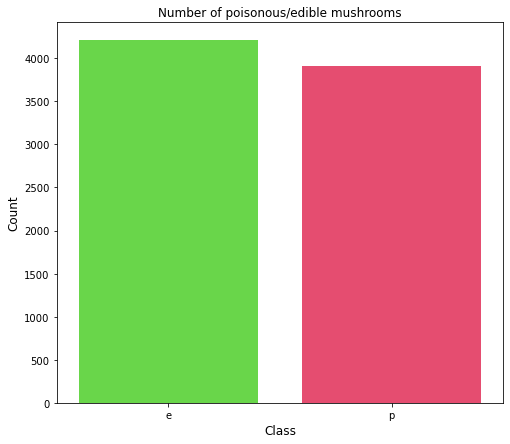

In [95]:
#Graph of edible and poisonous mushrooms
count = df_load['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(x = count.index, y = count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

For the correlation graphs to work it is necessarty to encode the features to numeric values. <br>
And we also drop the column with just one value, because it's effect is not important. <br>
NA values represnted by "?" are going to be replaced with the value 0 by LabelEncoder.

In [96]:
df_load_drop = df_load.drop(columns=['veil-type'])

Let us check for duplicates just to be sure

In [97]:
# Label Encoder
le_df=LabelEncoder()
dfEncoded = pd.DataFrame()
for col in df_load_drop.columns:
    dfEncoded[col] = le_df.fit_transform(df_load_drop[col])
dfEncoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [98]:
for i in df_load  :
    print('{}:{}'.format(i,np.unique(df_load [i])))
print("\n")
for col in dfEncoded:
    print('{}:{}'.format(col,np.unique(dfEncoded[col])))
# mapping number to letter in collumn

class:['e' 'p']
cap-shape:['b' 'c' 'f' 'k' 's' 'x']
cap-surface:['f' 'g' 's' 'y']
cap-color:['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises:['f' 't']
odor:['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment:['a' 'f']
gill-spacing:['c' 'w']
gill-size:['b' 'n']
gill-color:['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape:['e' 't']
stalk-root:['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring:['f' 'k' 's' 'y']
stalk-surface-below-ring:['f' 'k' 's' 'y']
stalk-color-above-ring:['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring:['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type:['p']
veil-color:['n' 'o' 'w' 'y']
ring-number:['n' 'o' 't']
ring-type:['e' 'f' 'l' 'n' 'p']
spore-print-color:['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population:['a' 'c' 'n' 's' 'v' 'y']
habitat:['d' 'g' 'l' 'm' 'p' 'u' 'w']


class:[0 1]
cap-shape:[0 1 2 3 4 5]
cap-surface:[0 1 2 3]
cap-color:[0 1 2 3 4 5 6 7 8 9]
bruises:[0 1]
odor:[0 1 2 3 4 5 6 7 8]
gill-attachment:[0 1]
gill-spacing:[0 1]
gill-s

Now that we encoded our data let us look at the correlation between the explanatory and the dependant vairable.

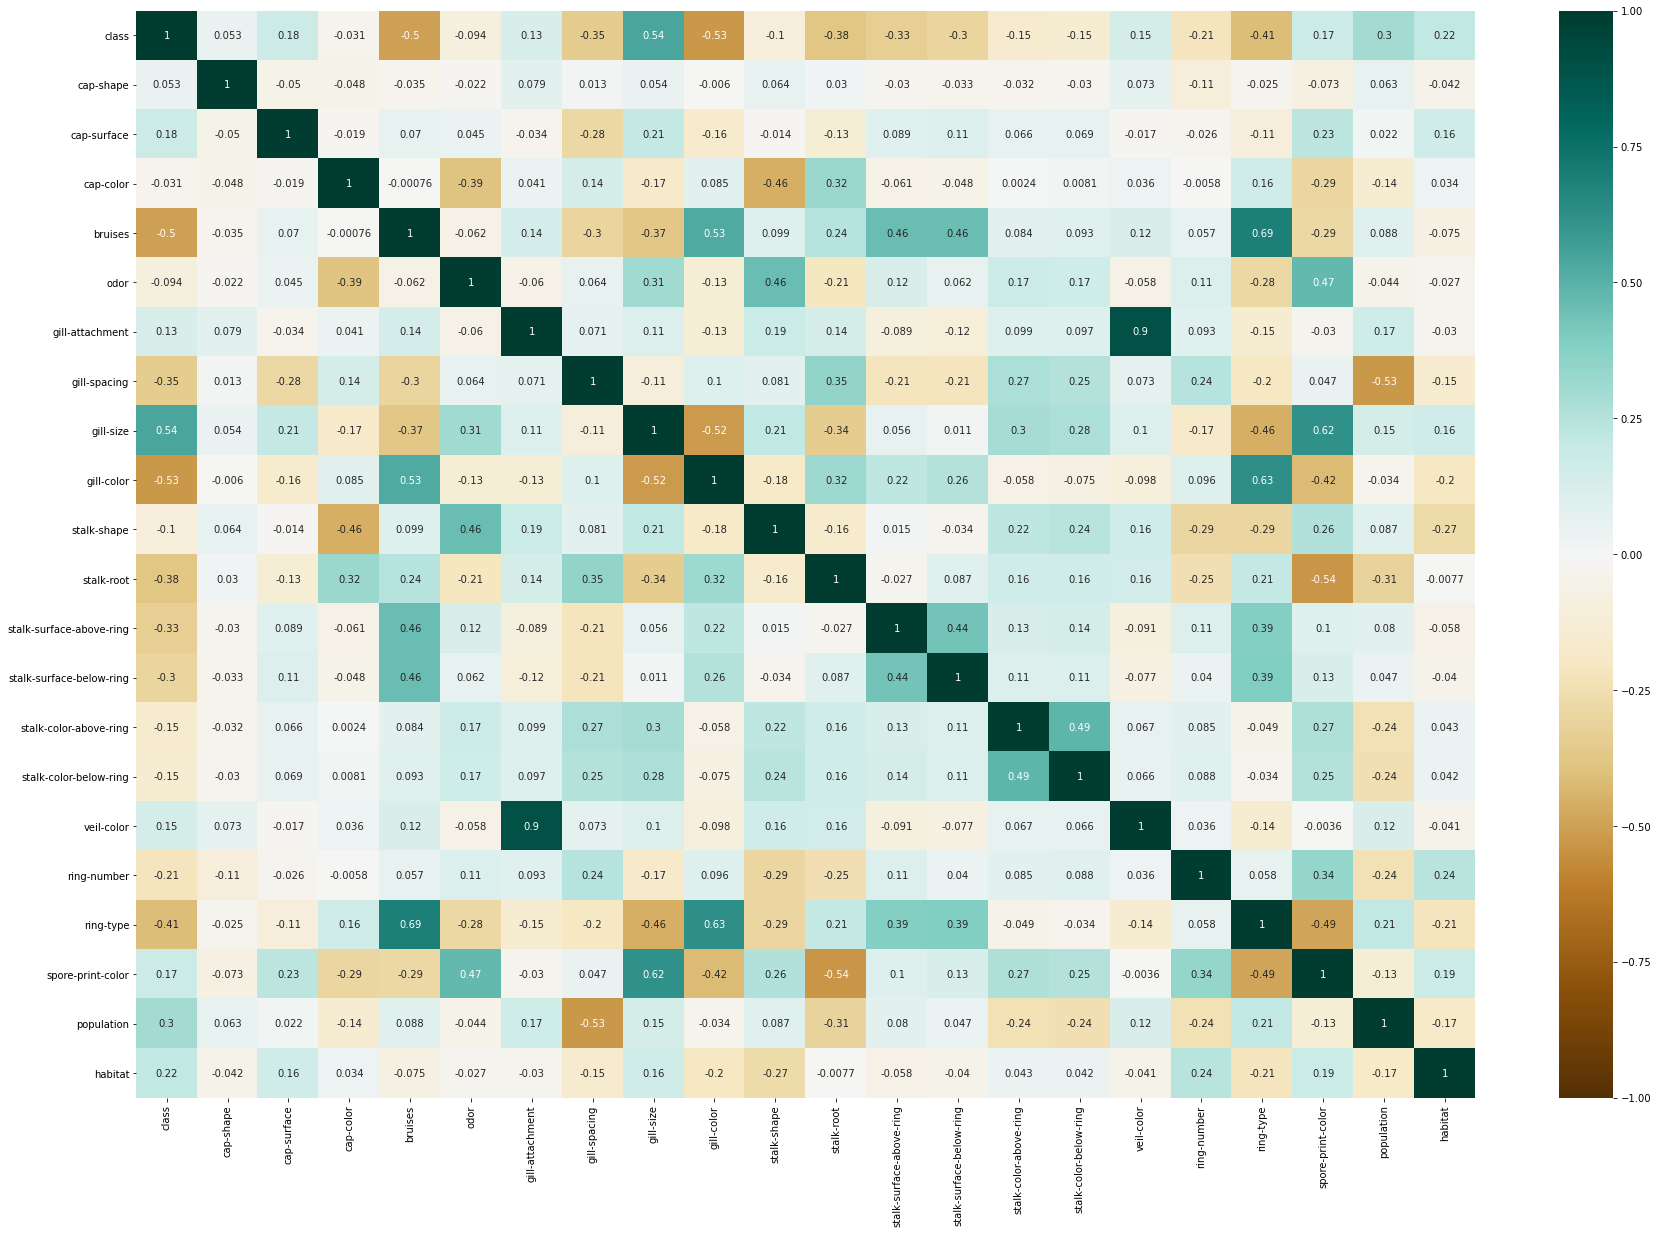

In [99]:
plt.figure(figsize=(30, 20))
corr = dfEncoded.corr()
sns.heatmap(corr,
            vmin=-1,
            cmap='BrBG',
            annot=True);
# the brighter the color, the stronger correlation between attributes

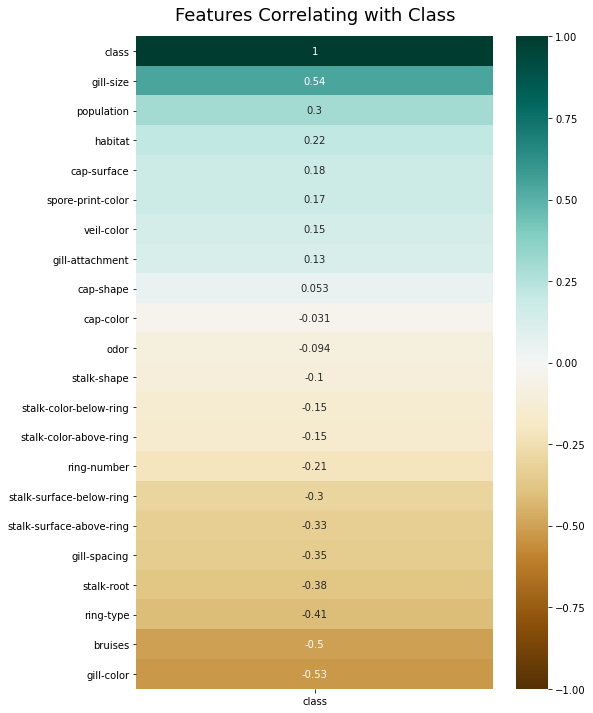

In [100]:
#alternative to corr matrix
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dfEncoded.corr()[['class']].sort_values(by='class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Class', fontdict={'fontsize':18}, pad=16);

From the graphs above it is visible, that the most correlated features are: gill-size, population and habitat. <br>
So let's look at them a bit closer.

### Cheatsheet for plots below
class: edible (0), poisonous (1)
<br>gill-size: broad (0), narrow (1)
<br>population: abundant (0),clustered (1), numerous (2),scattered (3),several            <br>(4),solitary (5)
<br>habitat: grasses(0),leaves(1),meadows(2),paths(3),urban(4),waste(5),woods (6)



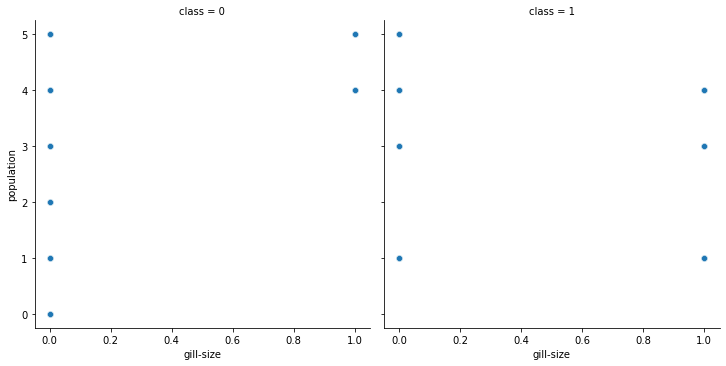

In [101]:
#exploring the most correlated characteristics with class
sns.relplot(x='gill-size',y='population',col='class',data=dfEncoded)
# if gill-size is broad (0) and population is abundant (0) or numerous (2), mushroom is edible (0)
# if gill-size is narrow (1) and population is solitary (5), mushroom is not edible (0)

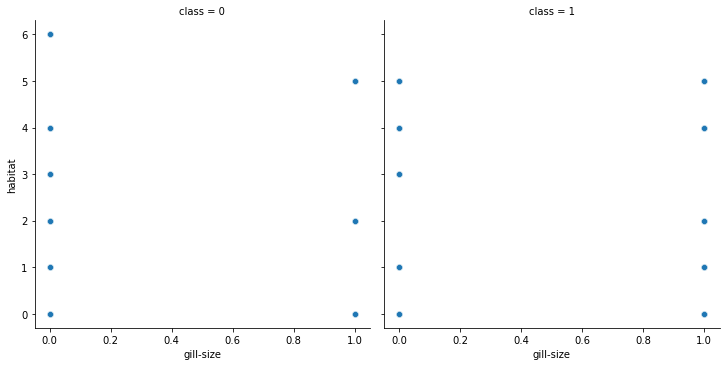

In [102]:
sns.relplot(x='gill-size',y='habitat',col='class',data=dfEncoded)
#if gill-size is broad (0) and habitat is meadow (2) and wood (6), mushroom is edible (0)


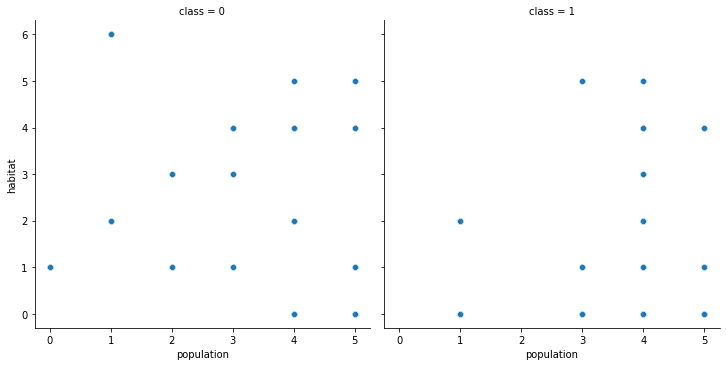

In [103]:
sns.relplot(x='population',y='habitat',col='class',data=dfEncoded)

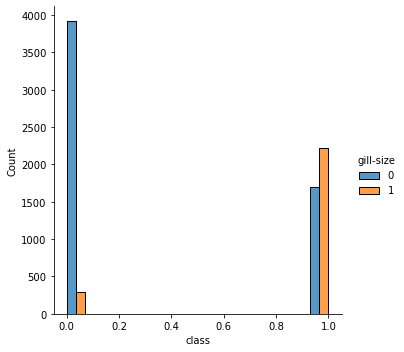

In [104]:
sns.displot(dfEncoded, x="class", hue="gill-size", multiple="dodge")
#the majority of edible mushrooms have broad gill-size

Now that we know what are we working with we can finally get to the data preprocessing and model building.

### Splitting data

In [105]:
train=df_load.sample(frac=0.75,random_state=42) #random state is a seed value
test=df_load.drop(train.index)

### Preprocessing

**Requirements on preprocessing:**
(Any two of the following operations are mandatory)
<ul>
 <li>remove rows based on subsetting</li>
 <li>derive new columns</li>
 <li>use aggregation operators</li>
 <li>treat missing values</li>

#### Handling duplicates

In [106]:
#duplicate values
rows = len(train) + len(test)
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)
no_duplicates = len(train) + len(test)
print ("Number of duplicates in the dataset: ", (rows - no_duplicates))

Number of duplicates in the dataset:  0


#### Handling the null values

In [107]:
missingTrain = train.loc[train['stalk-root'] == "?"]
missingTest = test.loc[test['stalk-root'] == "?"]
#we check how many values are missing
print("Total train rows: " + str(train.shape[0]) + "\nRows with missing values: " + str(missingTrain.shape[0]))
print("Total test rows: " + str(test.shape[0]) + "\nRows with missing values: " + str(missingTest.shape[0]))
#That is quite a lot of rows, it is probably going to better to drop the whole column
df_preprTrain = train.drop(columns = ['stalk-root'])
df_preprTest = test.drop(columns = ['stalk-root'])
#We have dealt with the missing values

Total train rows: 6093
Rows with missing values: 1860
Total test rows: 2031
Rows with missing values: 620



Alternatively we could replace the "?" values with zeroes or mode value

In [108]:
"""
#replacing with zeroes
train["stalk-root"] = train["stalk-root"].replace("?", 0)

#replacing with mode
train['stalk-root'].value_counts()
train['stalk-root'].replace("?", train['stalk-root'].mode()[0], inplace=True)"""

'\n#replacing with zeroes\ntrain["stalk-root"] = train["stalk-root"].replace("?", 0)\n\n#replacing with mode\ntrain[\'stalk-root\'].value_counts()\ntrain[\'stalk-root\'].replace("?", train[\'stalk-root\'].mode()[0], inplace=True)'

Next we have to drop the column **veil-type** with just one value

In [109]:
df_preprTrain = df_preprTrain.drop(columns = ['veil-type'])
df_preprTest = df_preprTest.drop(columns = ['veil-type'])

### Recoding features

In [110]:
newRingNumberValues = {'n':0, 'o': 1, 't': 2} 
df_preprTrain["ringsCount"] = df_preprTrain["ring-number"].map(newRingNumberValues)
df_preprTest["ringsCount"] = df_preprTest["ring-number"].map(newRingNumberValues)


newBruisesValues = {'t':1, 'f': 0}
df_preprTrain['hasBruises'] = df_preprTrain['bruises'].map(newBruisesValues)
df_preprTest['hasBruises'] = df_preprTest['bruises'].map(newBruisesValues)

df_preprTrain = df_preprTrain.drop(columns = ['bruises', 'ring-number'])
df_preprTest = df_preprTest.drop(columns = ['bruises', 'ring-number'])

### Creating a new feature

In the project requirements it states, that we are obligated to do this.

In [111]:
df_preprTrain["avgRingsByCapColor"] = df_preprTrain[["cap-color", "ringsCount"]].groupby('cap-color').transform('mean')
df_preprTest["avgRingsByCapColor"] = df_preprTest[["cap-color", "ringsCount"]].groupby('cap-color').transform('mean')

### Final data preparation

In [112]:
Y_train = df_preprTrain.pop("class")
Y_test = df_preprTest.pop("class")
X_train = df_preprTrain
X_test = df_preprTest

In [113]:
toRemoveList = ["ringsCount", "hasBruises", "avgRingsByCapColor"]
allTrainColList = list(X_train.columns)
allTestColList = list(X_test.columns)
for elem in toRemoveList:
    allTrainColList.remove(elem)
    allTestColList.remove(elem)
featuresTrain_to_encode = allTrainColList
featuresTest_to_encode = allTestColList

X_train = pd.get_dummies(X_train[featuresTrain_to_encode])
X_test = pd.get_dummies(X_test[featuresTest_to_encode])

In [131]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2031 entries, 2 to 8112
Columns: 106 entries, cap-shape_b to habitat_w
dtypes: uint8(106)
memory usage: 226.1 KB


### Creating model

**Requirements**: Use any classifier. Choose one of the following two options:

- perform train/test split
- use crossvalidation

Also, evaluate and compare at least two algorithms of different types (e.g. logistic regression and random forest).

### RandomForrest

In [132]:
modelForest = RandomForestClassifier(random_state=42)
modelForest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [133]:
predictionsForest = modelForest.predict(X_test)

In [134]:
predictionsForest

array(['e', 'p', 'e', ..., 'e', 'p', 'e'], dtype=object)

In [118]:
accuracy_score(Y_test, predictionsForest)

1.0

In [119]:
reportForest = classification_report(Y_test, predictionsForest)

In [120]:
print(reportForest)

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1076
           p       1.00      1.00      1.00       955

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [121]:
confmatrixForest =confusion_matrix(Y_test, predictionsForest)
print(confmatrixForest)

[[1076    0]
 [   0  955]]


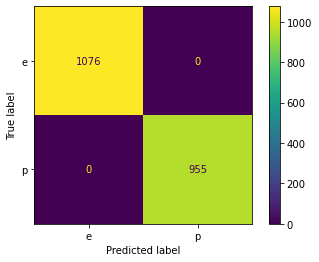

In [122]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(modelForest, X_test, Y_test)

In [123]:
#we omit n_estimators = 100, because that is the default value for the parameter
param_grid = { 
    'n_estimators': [50, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(modelForest, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

In [ ]:
# returns the best model
CV_rfc.best_estimator_

In [ ]:
# results obtained by the best model
CV_rfc.best_score_ 

In [ ]:
# the best parameters
CV_rfc.best_params_

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

In [ ]:
# Displaying the decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)

tree.plot_tree(dt,
           feature_names = list(X_train.columns), 
           class_names=Y_train,
           filled = True);

In [197]:
predictions_tree = dt.predict(X_test) 

In [198]:
accuracy_score(Y_test, predictions_tree)

1.0

In [199]:
treeReport = classification_report(Y_test, predictions_tree)

In [200]:
print(treeReport)

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1076
           p       1.00      1.00      1.00       955

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



<AxesSubplot:>

Text(0.5, 42.0, 'PREDICTED LABEL')

Text(42.0, 0.5, 'TRUE LABEL')

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

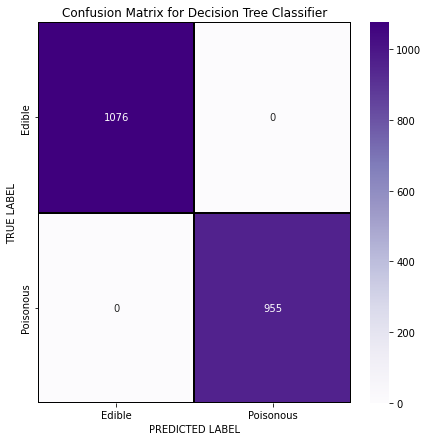

In [201]:
cm = confusion_matrix(Y_test, predictions_tree)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [202]:
parametergrid= {"criterion" : ("gini", "entropy"),"max_depth":(1,2,3,4,5,6,7,8,9,10),"min_samples_leaf":(1,2,3,4,5,6,7,8,9,10)
}
clf = GridSearchCV(DecisionTreeClassifier(random_state=0), parametergrid)


In [85]:
clf.fit(X_train, Y_train)

NameError: name 'clf' is not defined

In [204]:
# returns the best model
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=0)

In [205]:
# the best parameters
clf.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3}

In [206]:
# results obtained by the best model
clf.best_score_ 

1.0

### Logistic regression

In [234]:
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [235]:
print("Test Accuracy: {}%".format(round(lr.score(X_test, Y_test)*100,2)))

Test Accuracy: 99.9%


In [236]:
lrPred = lr.predict(X_test)
print("Logistic Regression report: \n\n", classification_report(Y_test, lrPred))

Logistic Regression report: 

               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1076
           p       1.00      1.00      1.00       955

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



<AxesSubplot:>

Text(0.5, 42.0, 'PREDICTED LABEL')

Text(42.0, 0.5, 'TRUE LABEL')

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Classifier')

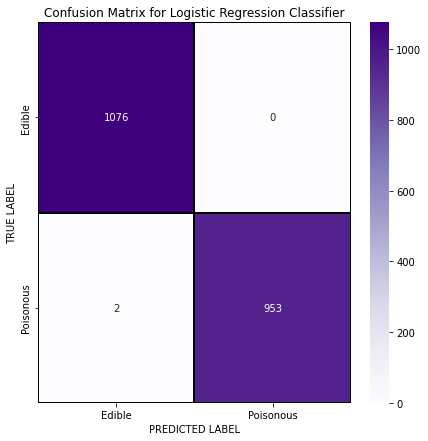

In [237]:
cm = confusion_matrix(Y_test, lrPred)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

### Logistic regression with 3 main predictors (see corr. matrix)

For LR we need to encode features using the LabelEncoder

In [241]:
pd.options.mode.chained_assignment = None

predictors = ['gill-size', 'population', 'habitat']
X_trainLR = df_preprTrain[predictors]
X_testLR = df_preprTest[predictors]
for col in X_trainLR:
    X_trainLR[col] = le_df.fit_transform(X_trainLR[col])
    X_testLR[col] = le_df.fit_transform(X_testLR[col])
y_trainLR = le_df.fit_transform(Y_train)
X_trainLR[:10] # first five rows of training data without target
y_trainLR[:10]

,gill-size,population,habitat
1971,0,3,1
6654,1,4,2
5606,1,4,2
3332,0,5,0
6988,1,4,2
5761,1,4,2
5798,0,3,5
3064,0,5,4
1811,0,4,0
3422,0,5,0


array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [242]:
modelLR = LogisticRegression()

In [243]:
modelLR.fit(X_trainLR, y_trainLR)

LogisticRegression()

In [244]:
y_predict = modelLR.predict(X_testLR)

In [245]:
y_predict[:20]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [246]:
modelLR.coef_
modelLR.intercept_

array([[2.74344474, 0.73108328, 0.36310125]])

array([-4.08905032])

In [247]:
np.exp(modelLR.coef_)
predictors

array([[15.54042573,  2.07732973,  1.43778143]])

['gill-size', 'population', 'habitat']

### LR Crossvalidation

In [248]:
model_lrcv = LogisticRegressionCV(cv=20,Cs=1,scoring = "accuracy" )
model_lrcv.fit(X_trainLR, y_trainLR)

LogisticRegressionCV(Cs=1, cv=20, scoring='accuracy')

In [249]:
model_lrcv.scores_
np.average(model_lrcv.scores_[1])

{1: array([[0.72786885],
        [0.69508197],
        [0.66557377],
        [0.68852459],
        [0.69180328],
        [0.73442623],
        [0.69836066],
        [0.70819672],
        [0.70163934],
        [0.7442623 ],
        [0.76065574],
        [0.71803279],
        [0.68852459],
        [0.71710526],
        [0.69407895],
        [0.69407895],
        [0.69407895],
        [0.69078947],
        [0.69078947],
        [0.73026316]])}

0.7067067515099223

In [250]:
from sklearn import *
model_lrcv.score(X_trainLR,y_trainLR)
#mean accuracy of the test data

0.7073691120958477

### Grid search LR
hyperparametr tuning

In [251]:
model_lrcv = LogisticRegressionCV(cv=20, Cs=20)
model_lrcv.fit(X_trainLR, y_trainLR)
model_lrcv.C_
#selected C value

LogisticRegressionCV(Cs=20, cv=20)

array([0.01274275])

In [252]:
np.average(model_lrcv.scores_[1])

0.7953582560396893

In [253]:
scores = cross_val_score(model_lrcv, X_trainLR, y_trainLR, cv=10) # evaluation
scores

array([0.83770492, 0.83114754, 0.81147541, 0.84893268, 0.84400657,
       0.85550082, 0.81609195, 0.83251232, 0.83743842, 0.83908046])

In [254]:
model = LogisticRegression(C=20)
score = cross_val_score(model, X_trainLR, y_trainLR, cv=20) #cv generator
score
np.average(score)

array([0.79344262, 0.8       , 0.79672131, 0.82295082, 0.78688525,
       0.80327869, 0.84262295, 0.8       , 0.79672131, 0.81967213,
       0.85245902, 0.80327869, 0.79344262, 0.75986842, 0.80921053,
       0.78947368, 0.79276316, 0.83223684, 0.82894737, 0.80263158])

0.8063303494391718

### N-B Classification

In [255]:
nbc = GaussianNB()
nbc.fit(X_train,Y_train)

GaussianNB()

In [259]:
# at tam mame i neco, co nevyjde 100 % :D
print("Test Accuracy: {}%".format(round(nbc.score(X_test,Y_test)*100,2)))

Test Accuracy: 95.22%


In [260]:
nbcPred = nbc.predict(X_test)
print("N_B Classification report: \n\n", classification_report(Y_test, nbcPred))

N_B Classification report: 

               precision    recall  f1-score   support

           e       1.00      0.91      0.95      1076
           p       0.91      1.00      0.95       955

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.96      0.95      0.95      2031



<AxesSubplot:>

Text(0.5, 42.0, 'PREDICTED LABEL')

Text(42.0, 0.5, 'TRUE LABEL')

Text(0.5, 1.0, 'Confusion Matrix for N-B Classification')

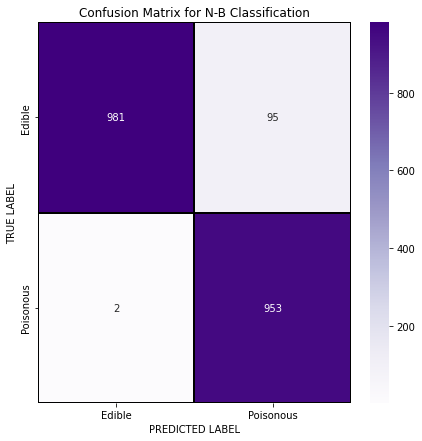

In [261]:
cm = confusion_matrix(Y_test, nbcPred)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for N-B Classification')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

Alright, that about wraps it up. Almost all our models have a 100% accurancy, which would normally be absolutely alarming, but because of the dataset's charachteristics it is understandable.

### ROC and AUC

Logistic-regression

In [71]:
# metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
falsepositive, truepositive, _ = metrics.roc_curve(y_test,  y_pred_proba)



Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

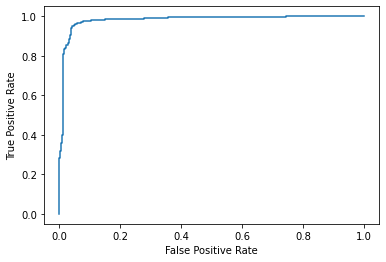

In [72]:
# ROC curve
plt.plot(falsepositive, truepositive)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [75]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
falsepositive, truepositive, _= metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)


Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

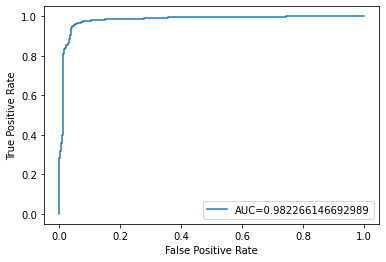

In [76]:
#create ROC curve
plt.plot(falsepositive, truepositive,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Decision trees

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]
falsepositive, truepositive, _ = metrics.roc_curve(y_test,  y_pred_proba)

NameError: name 'clf' is not defined

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
roc_auc = roc_auc_score(y_test, y_test_probs)

NameError: name 'y_test_probs' is not defined